# Financiamento Imobiliário

**Residencial** registra as operações de crédito destinadas à construção, reforma, ampliação e aquisição de unidades habitacionais, realizadas nas condições regulamentadas pelo Sistema Financeiro da Habitação - SFH, pelo Sistema Hipotecário e por outras modalidades operacionais.

**Comercial** registra as operações de crédito destinadas à construção, reforma, ampliação e aquisição de unidades industriais e comerciais, exceto as habitacionais.
As rendas a incorporar de financiamentos imobiliários devem ser registradas nas adequadas contas de financiamentos imobiliários, mediante controle em subtítulo de uso interno.Os valores das rubricas são equivalentes ao conceito de carteira ativa das operações de crédito do SCR.

Fonte: https://www.bcb.gov.br/estatisticas/grafico/graficocosic/contabil_financiamentos_imobiliarios

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

financiamentos_construcao = pd.read_csv('datasets/Financiamentos_2014_2020.csv', sep = ';', decimal=',')
financiamentos_construcao # Tem que selecionar o período que nos interessa.
financiamentos_construcao['total'] = financiamentos_construcao['Comercial'] + financiamentos_construcao['Residencial']



## Financiamento Residencial

In [2]:
financiamento_residencial = financiamentos_construcao.loc[: , ['DateTime', 'Residencial']]

financiamento_residencial['DateTime'] = pd.to_datetime(financiamento_residencial['DateTime'] )

financiamento_residencial['DateTime'] = financiamento_residencial['DateTime'].apply(lambda x: x.replace(day=1))

financiamento_residencial = financiamento_residencial.set_index('DateTime')

financiamento_residencial = financiamento_residencial['2014-01-01':'2020-12-12']

taxa = financiamento_residencial.loc['2014-05-01']['Residencial']/financiamento_residencial.loc['2014-04-01']['Residencial']

# Pensar o que fazer em relação a estes 3 meses
financiamento_residencial.loc[pd.to_datetime('2014-03-01')] = financiamento_residencial.loc['2014-04-01'].values[0]/taxa
financiamento_residencial.loc[pd.to_datetime('2014-02-01')] = financiamento_residencial.loc['2014-03-01'].values[0]/taxa
financiamento_residencial.loc[pd.to_datetime('2014-01-01')] = financiamento_residencial.loc['2014-02-01'].values[0]/taxa

financiamento_residencial = financiamento_residencial.sort_index(ascending=True)

financiamento_residencial # Volume de financiamentos destinados à construção - Setor Residencial



,Residencial
DateTime,
2014-01-01,3.791781e+11
2014-02-01,3.886426e+11
2014-03-01,3.983434e+11
2014-04-01,4.082862e+11
2014-05-01,4.184773e+11
...,...
2020-08-01,6.995890e+11
2020-09-01,7.067158e+11
2020-10-01,7.143470e+11


<AxesSubplot:xlabel='DateTime', ylabel='Residencial'>

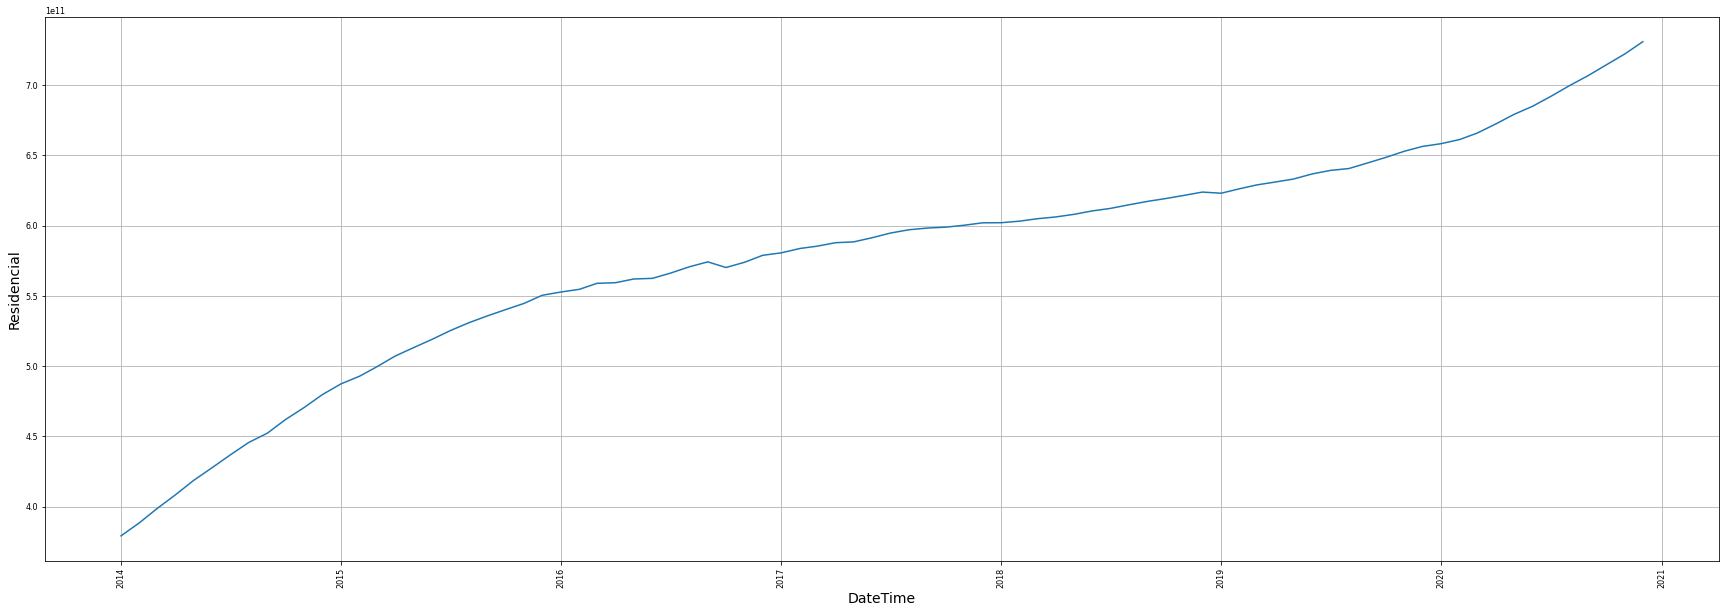

In [3]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=financiamento_residencial, x = "DateTime", y = "Residencial") # Tem que ajustar os rótulos.

Salvamos o objeto **financiamento_residencial** para utilizar no [Passo 2](passo2.ipynb)

In [4]:
file_to_store = open("datasets/financiamento_residencial.pickle", "wb")
pickle.dump(financiamento_residencial, file_to_store)
file_to_store.close()

## Financiamento Comercial

In [5]:
financiamento_comercial = financiamentos_construcao.loc[: , ['DateTime', 'Comercial']]

financiamento_comercial['DateTime'] = pd.to_datetime(financiamento_comercial['DateTime'] )

financiamento_comercial['DateTime'] = financiamento_comercial['DateTime'].apply(lambda x: x.replace(day=1))

financiamento_comercial = financiamento_comercial.set_index('DateTime')

financiamento_comercial = financiamento_comercial['2014-01-01':'2020-12-12']

taxa = financiamento_comercial.loc['2014-05-01']['Comercial']/financiamento_comercial.loc['2014-04-01']['Comercial']

# Pensar o que fazer em relação a estes 3 meses
financiamento_comercial.loc[pd.to_datetime('2014-03-01')] = financiamento_comercial.loc['2014-04-01'].values[0]/taxa
financiamento_comercial.loc[pd.to_datetime('2014-02-01')] = financiamento_comercial.loc['2014-03-01'].values[0]/taxa
financiamento_comercial.loc[pd.to_datetime('2014-01-01')] = financiamento_comercial.loc['2014-02-01'].values[0]/taxa

financiamento_comercial = financiamento_comercial.sort_index(ascending=True)

financiamento_comercial # Volume de financiamentos destinados à construção - Setor Comercial

,Comercial
DateTime,
2014-01-01,1.243798e+10
2014-02-01,1.284174e+10
2014-03-01,1.325861e+10
2014-04-01,1.368902e+10
2014-05-01,1.413339e+10
...,...
2020-08-01,1.382031e+10
2020-09-01,1.340438e+10
2020-10-01,1.329268e+10


<AxesSubplot:xlabel='DateTime', ylabel='Comercial'>

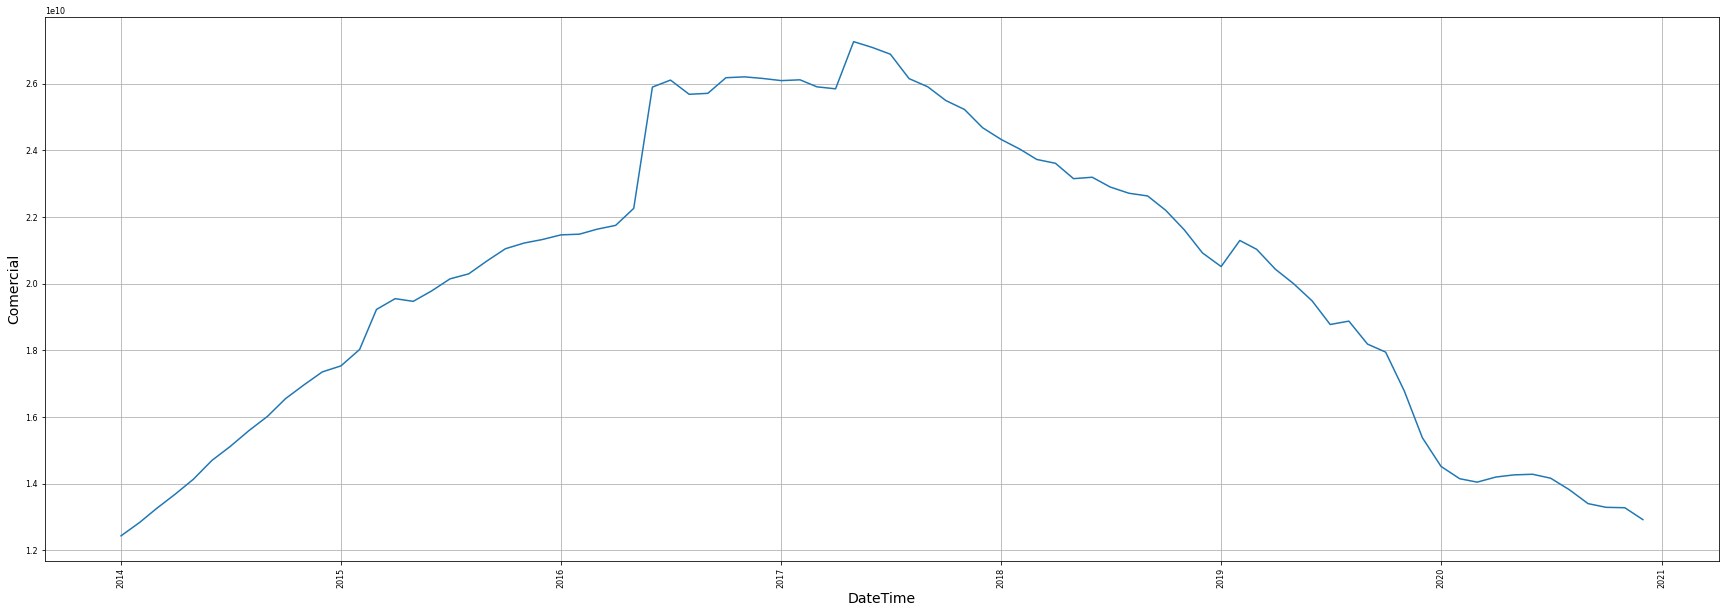

In [6]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=financiamento_comercial, x = "DateTime", y = "Comercial") # Tem que ajustar os rótulos.

Observem a 'inversão' nos financiamentos...

Salvamos o objeto **financiamento_residencial** para utilizar no [Passo 2](passo2.ipynb)

In [7]:
file_to_store = open("datasets/financiamento_comercial.pickle", "wb")
pickle.dump(financiamento_comercial, file_to_store)
file_to_store.close()